# Photo-z Determination for SpIES High-z Candidates

Notebook that actually applies the algorithms from `SpIESHighzQuasarPhotoz.ipynb` to the quasar candidates.

In [1]:
## Read in the Training Data and Instantiating the Photo-z Algorithm

%matplotlib inline
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
#data = Table.read('GTR-ADM-QSO-ir-testhighz_findbw_lup_2016_starclean.fits')
#JT PATH ON TRITON to training set after classification
#data = Table.read('/Users/johntimlin/Catalogs/QSO_candidates/Training_set/GTR-ADM-QSO-ir-testhighz_findbw_lup_2016_starclean_with_shenlabel.fits')
data = Table.read('/Users/johntimlin/Catalogs/QSO_candidates/Training_set/GTR-ADM-QSO-Trainingset-with-McGreer-VVDS-DR12Q_splitlabel_VCVcut_best.fits')

#JT PATH HOME USE SHEN ZCUT
#data = Table.read('/home/john/Catalogs/QSO_Candidates/Training_set/GTR-ADM-QSO-ir-testhighz_findbw_lup_2016_starclean_with_shenlabel.fits')


#data = data.filled()
# Remove stars
qmask = (data['zspec']>0)
qdata = data[qmask]
print len(qdata)

# X is in the format need for all of the sklearn tools, it just has the colors
#Xtrain = np.vstack([ qdata['ug'], qdata['gr'], qdata['ri'], qdata['iz'], qdata['zs1'], qdata['s1s2']]).T
Xtrain = np.vstack([np.asarray(qdata[name]) for name in ['ug', 'gr', 'ri', 'iz', 'zs1', 's1s2']]).T

#y = np.array(data['labels'])
ytrain = np.array(qdata['zspec'])

241722


Since we are running on separate test data, we don't need to do a `train_test_split` here.  But we will scale the data.  Need to remember to scale the test data later!

In [2]:
# For algorithms that need scaled data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)  # Don't cheat - fit only on training data

StandardScaler(copy=True, with_mean=True, with_std=True)

## Applying to Quasars Candidates

Quasars candidates from the legacy KDE algorithm are in<br>
`GTR-ADM-QSO-ir-testhighz_kdephotoz_lup_2016_quasar_candidates.dat`

Quasars candidates from the Random Forest Algorithm are in<br>
`GTR-ADM-QSO-ir_good_test_2016_out.fits`

Quasar candidates from the RF, SVM, and/or bagging algorithms are in<br>
`GTR-ADM-QSO-ir_good_test_2016_out_Stripe82all.fits`<br>

In the case of the latter file, this includes Stripe82 only.  If we run on the other files, we might want to limit to Stripe 82 to keep the computing time reasonable.

In [3]:
#testdata = Table.read('GTR-ADM-QSO-ir_good_test_2016_out_Stripe82all.fits')
# TEST DATA USING 3.5<z<5 zrange ON TRITON
#testdata = Table.read('/Users/johntimlin/Catalogs/QSO_candidates/Final_S82_candidates_full/GTR-ADM-QSO-ir_good_test_2016_out_Stripe82all.fits')

# TEST DATA USING 2.9<z<5.4 zrange ON HOME
#testdata = Table.read('/Users/johntimlin/Catalogs/QSO_Candidates/photoz/SpIES_SHELA_Quasar_Canidates_Shen_zrange_JTmultiproc.fits')
#testdata = Table.read('./catalogs/HZ_forphotoz.fits')
testdata = Table.read('/Users/johntimlin/Catalogs/QSO_candidates/New_training_candidates/Test_point_source_classifier/Final_sets/HZLZ_combined_all_wphotoz_alldata_allclassifiers.fits')

In [4]:
#Limit to objects that have been classified as quasars
#qsocandmask = ((testdata['ypredRFC']==0) | (testdata['ypredSVM']==0) | (testdata['ypredBAG']==0))
testdatacand = testdata#[qsocandmask]
print len(testdata),len(testdatacand)

1984 1984


## If you want to compare ZSPEC to ZPHOT, use the cells below for test set

In [7]:
## Test zspec objects with zspec >=2.9 and see how well the zphot matches with zspec
#testdata = Table.read('/Users/johntimlin/Catalogs/QSO_candidates/Final_S82_candidates_full/QSOs_S82_wzspec_wcolors.fits')

#Limit to objects that have been classified as quasars
#qsocandmask = ((testdata['ypredRFC']==0) | (testdata['ypredSVM']==0) | (testdata['ypredBAG']==0))
#qsocandmask = (testdata['ZSPEC'] >= 2.9)

#testdatacand = testdata#[qsocandmask]
#print len(testdata),len(testdatacand)

15891 15891


### Scale the test data 

In [5]:
#Xtest = np.vstack([ testdatacand['ug'], testdatacand['gr'], testdatacand['ri'], testdatacand['iz'], testdatacand['zs1'], testdatacand['s1s2']]).T
Xtest = np.vstack([np.asarray(testdatacand[name]) for name in ['ug', 'gr', 'ri', 'iz', 'zs1', 's1s2']]).T

XStest = scaler.transform(Xtest)  # apply same transformation to test data

### Not currently executing the next 2 cells, but putting the code here in case we want to do it later.

In [ ]:
# Read in KDE candidates
dataKDE = Table.read('GTR-ADM-QSO-ir-testhighz_kdephotoz_lup_2016_quasar_candidates.dat', format='ascii')
print dataKDE.keys()
print len(XKDE)
XKDE = np.vstack([ dataKDE['ug'], dataKDE['gr'], dataKDE['ri'], dataKDE['iz'], dataKDE['zch1'], dataKDE['ch1ch2'] ]).T

In [ ]:
# Read in RF candidates
dataRF = Table.read('GTR-ADM-QSO-ir_good_test_2016_out.fits')
print dataRF.keys()
print len(dataRF)
# Canidates only
maskRF = (dataRF['ypred']==0)
dataRF = dataRF[maskRF]
print len(dataRF)

# X is in the format need for all of the sklearn tools, it just has the colors
XRF = np.vstack([ dataRF['ug'], dataRF['gr'], dataRF['ri'], dataRF['iz'], dataRF['zs1'], dataRF['s1s2']]).T

---

### Instantiate Photo-z Algorithm of Choice

Here using Nadaraya-Watson and Random Forests

In [6]:
import numpy as np
from astroML.linear_model import NadarayaWatson
model = NadarayaWatson('gaussian', 0.05)

In [7]:
model.fit(Xtrain,ytrain)

In [8]:
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor()
modelRF.fit(Xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Apply Photo-z Algorithm(s)

#### Random Forest

In [9]:
zphotRF = modelRF.predict(Xtest)

#### Nadaraya-Watson

In [16]:
zphotNW = model.predict(Xtest)

/Users/johntimlin/anaconda/lib/python2.7/site-packages/astroML/linear_model/kernel_regression.py:52: RuntimeWarning: invalid value encountered in divide
  return (K * self.y).sum(1) / K.sum(1)


### Only need this if Xtest is too big

In [10]:
from dask import compute, delayed
def process(Xin):
    return model.predict(Xin)

# Create dask objects
dobjs = [delayed(process)(x.reshape(1,-1)) for x in Xtest]

In [11]:
import dask.threaded
ypred = compute(*dobjs, get=dask.threaded.get)

In [12]:
# The dask output needs to be reformatted.
zphotNW = np.array(ypred).reshape(1,-1)[0]

In [13]:
testdatacand['zphotNW'] = zphotNW
testdatacand['zphotRF'] = zphotRF

In [14]:
#TRITON PATH
#testdatacand.write('/Users/johntimlin/Catalogs/QSO_candidates/photoz/Candidates_photoz_S82_shenzrange.fits', format='fits')
#HOME PATH
#testdatacand.write('/home/john/Catalogs/QSO_Candidates/photoz/Candidates_photoz_S82_shenzrange.fits', format='fits')

testdatacand.write('./HZLZ_combined_all_hzclassifiers_wphotoz_new.fits')


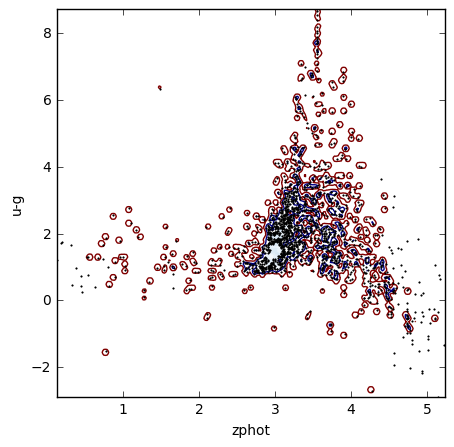

In [15]:
from densityplot import *
from pylab import *
fig = plt.figure(figsize=(5,5))
hex_scatter(testdatacand['zphotNW'],testdatacand['ug'], min_cnt=10, levels=2, std=True, smoothing=1,
            hkwargs={'gridsize': 100, 'cmap': plt.cm.Blues}, 
            skwargs={'color': 'k'})
plt.xlabel('zphot')
plt.ylabel('u-g')
#plt.xlim([-0.1,5.5])
#plt.ylim([-0.1,5.5])
plt.show()

(array([   2.,    1.,    0.,    3.,    1.,    1.,    1.,    5.,    8.,
           4.,    6.,    6.,    7.,    2.,    8.,   12.,   14.,   13.,
          29.,   29.,   19.,   30.,   43.,   40.,   37.,   28.,   40.,
          46.,   46.,   53.,   49.,   60.,   80.,   71.,   81.,   98.,
          97.,   97.,  130.,  165.,  166.,  181.,  228.,  316.,  390.,
         435.,  471.,  392.,  308.,  200.,  145.,  121.,   69.,  119.,
         147.,  123.,  104.,   58.,   14.,   13.,   12.,    7.,    2.,
           2.,    1.]),
 array([ 0.24562   ,  0.319459  ,  0.393298  ,  0.46713699,  0.54097599,
         0.61481499,  0.68865398,  0.76249298,  0.83633198,  0.91017097,
         0.98400997,  1.05784897,  1.13168796,  1.20552696,  1.27936596,
         1.35320495,  1.42704395,  1.50088295,  1.57472194,  1.64856094,
         1.72239994,  1.79623893,  1.87007793,  1.94391693,  2.01775592,
         2.09159492,  2.16543392,  2.23927291,  2.31311191,  2.38695091,
         2.4607899 ,  2.5346289 ,  2.6084

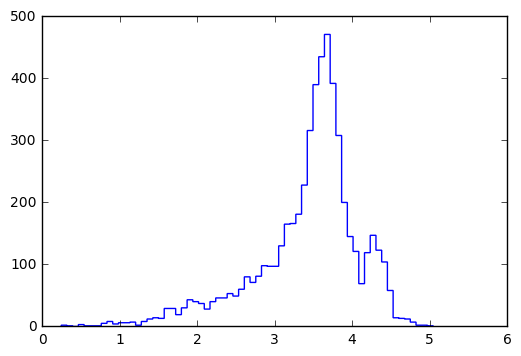

In [24]:
from astroML.plotting import hist as fancyhist
fancyhist(testdatacand['zphotRF'], bins="freedman", histtype="step")